## Thera Bank Personal Loan Campaign

### Data Description:
The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

### Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

### Methodology:
Logistic Regression, EDA, Classification and Confusion Matrix

### Prepared by:
Plinio Monteiro



In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
#Load/import data
df_Bank = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [4]:
df_Bank.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.40,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.50,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.30,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.60,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.90,3,0,1,0,0,0,0


In [5]:
df_Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
df_Bank.shape

(5000, 14)

### Observation 1 - Data Info and Shape

The dataset is comprised of 5000 rows/customers and 14 columns all numeric.

No missing values detected in the entire dataset.

## 2.0 Exploratory Data Analysis (EDA)
**Statistical Analysis of the Bank dataset.**

In [7]:
df_Bank.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,"5,000.00","2,500.50","1,443.52",1.00,"1,250.75","2,500.50","3,750.25","5,000.00"
Age,"5,000.00",45.34,11.46,23.00,35.00,45.00,55.00,67.00
Experience,"5,000.00",20.10,11.47,-3.00,10.00,20.00,30.00,43.00
Income,"5,000.00",73.77,46.03,8.00,39.00,64.00,98.00,224.00
ZIP Code,"5,000.00","93,152.50","2,121.85","9,307.00","91,911.00","93,437.00","94,608.00","96,651.00"
Family,"5,000.00",2.40,1.15,1.00,1.00,2.00,3.00,4.00
CCAvg,"5,000.00",1.94,1.75,0.00,0.70,1.50,2.50,10.00
Education,"5,000.00",1.88,0.84,1.00,1.00,2.00,3.00,3.00
Mortgage,"5,000.00",56.50,101.71,0.00,0.00,0.00,101.00,635.00
Personal Loan,"5,000.00",0.10,0.29,0.00,0.00,0.00,0.00,1.00


### 2.1 Insight - Possible data Entry problem
Experience minimum value is -3. This appears to be a data entry problem. It will be needed to cleanse/fix this data.


### 2.2 Insight associated to the dataset attributes


1. **ID:**         Categorical, qualitative variable ranging from 1 to 5000. 
2. **Age:**        Numerical, quantitative where age ranges from 23 to 67 years old.
3. **Experience:** Numerical, quantitative. Min experience in the dataset being -3 (error made during data entry) and max experience 43.
4. **Income:**     Numerical, quantitative. Income ranges from 8K to 224K where the mean is 73.77 (or 73,770).
5. **ZIP Code:**   Categorical and it does not appears to be meaninful to the overall model. 
6. **Family:**     Lowest family size being 1 and max being 4.
7. **CCAvg:**      Numerical, quantitative. Min average spending on credit cards per month being zero dollars and maximum being 10,000 dollars.
8. **Education:**  Categorical, qualitative. 1: Undergrad; 2: Graduate; 3: Advanced/Professional.
9. **Mortgage:**   Numerical, quantitative. Min mortage value in the dataset being zero dollars, which means there was no house mortage, and maximum value being 635,000 dollars.
10. **Personal Loan:** Target variable. categorical (binary), qualitative, nominal. If the customer accepted the personal loan offered in the last campaign then 1 else 0.
11. **Securities Account:** Categorical (binary), qualitative. If the customer has a securities account with the bank then 1 else 0.
12. **CD Account:** Categorical (binary), qualitatitve. If the customer has a certificate of deposit (CD) account with the bank then 1 else 0.
13. **Online:**     Categorical (binary), qualitative. If the customer uses internet banking facilities then 1 else 0.
14. **CreditCard:** Categorical (binary), qualitative. If the customer use a credit card then 1 else 0.


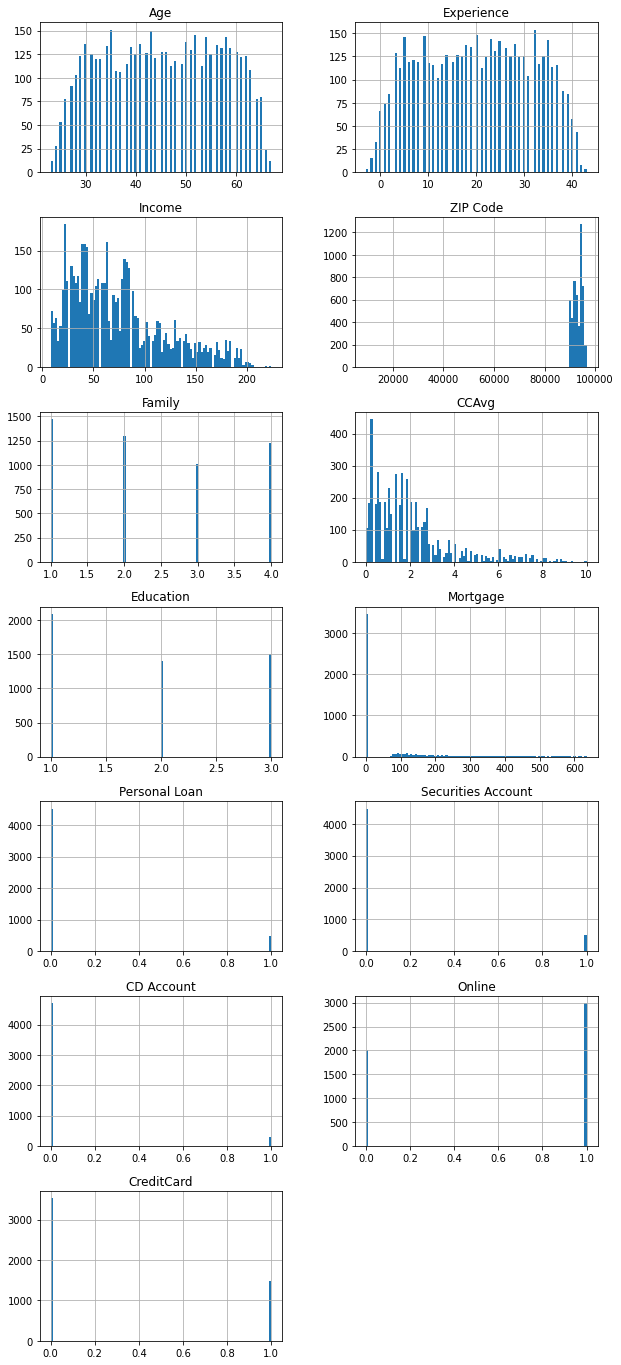

In [8]:
# let's first plot a histogram of the variables. Let's drop ID from this histogram
df_Bank1 = df_Bank.drop('ID', axis = 1)
columns = list(df_Bank1)
df_Bank1[columns].hist(stacked=False, bins=100, figsize=(10,35), layout=(10,2)); 

#### Findings: 
1. As shown above, Age and Experience are nomally distributed. 
2. Median Income is at 64K. 75th Percentile is at 98K.
3. Very few people have CD Accounts
4. CD Account is categorical (binary), qualitatitve, nominal. If the customer has a certificate of deposit (CD) account with the bank then 1 else 0.
5. Online is categorical (binary), qualitative, nominal. If the customer uses internet banking facilities then 1 else 0.
6. Personal Loan (the target variable). Very small population of customers have a personal loan.
7. Zip Code is concentrated on a relative small range indicating that this is a small community Bank.

### 2.3 Insight on the Target Variable distribution

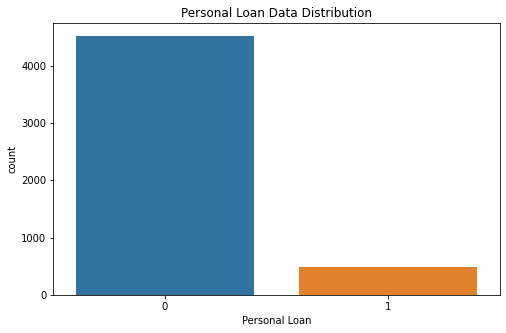

In [9]:
# Personal Loan is the target value. Let's check Personal Loan distribution.

plt.figure(figsize=(8,5))
plt.title('Personal Loan Data Distribution')
sns.countplot(df_Bank['Personal Loan'])
plt.show()

In [10]:
# Putting it all together in a more precise numerical representation

display(df_Bank['Personal Loan'].value_counts(), df_Bank['Personal Loan'].value_counts(normalize = True)*100)

0    4520
1     480
Name: Personal Loan, dtype: int64

0   90.40
1    9.60
Name: Personal Loan, dtype: float64

**Findings: Out of the  5000 customers, only 480 (or 9.6%) have personal loan.**

### 2.4 Number of Unique Values for each column

In [11]:
df_Bank.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

   **Findings:** ID has exactly 5000 distinct values. One distinct value per row.     
             **Age** has 45 distinct values.<br>
             **Experience** show 47 but we will need to manage the negative values.<br>
             **Income** There are a total of 162 distinct income values in the dataset.<br>
             **Zip Code** has a total of 467 distinct zip codes.<br>
             **Family** has 4 distinct values. <br>
             **CCAvg** has a total of 108 distinct values.<br>
             **Education** contains 3 distinct values.<br>
             **Morgage** has a total of 347 distinct values.<br>
             **Personal Loan**, **securities Account**, **CD Account**, **Online** and **Credit Card** have each 2 distinct values.<br>
            

### 2.5 Number of People with Zero Mortgage

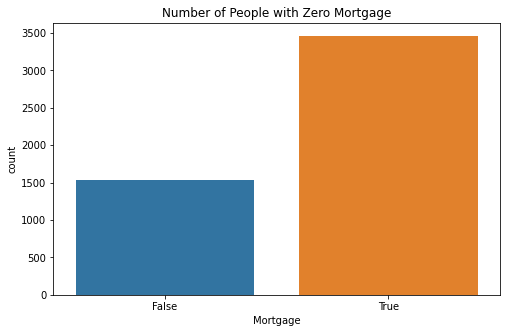


Number of People with Zero Mortgage is =  3462


In [12]:
# Personal Loan is the target value. Let's check Mortgage distribution.

plt.figure(figsize=(8,5))
plt.title('Number of People with Zero Mortgage')
sns.countplot(df_Bank['Mortgage'] == 0)
plt.show()

print('')
print("Number of People with Zero Mortgage is = ", format(len(df_Bank.loc[df_Bank['Mortgage'] == 0])))

#### Findings: As shown in the countplot and the count above, there are a total of 3462 people with zero mortgage

### 2.6 People with zero monthly credit card spending

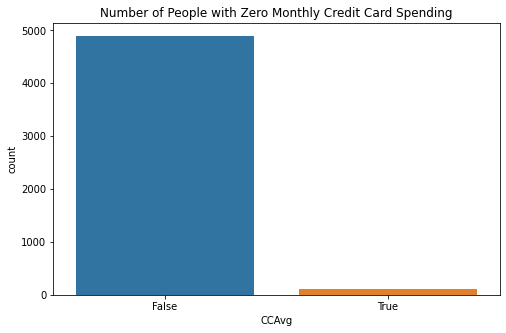


Number of People with Zero Monthly Credit Card Spending is =  106


In [13]:
# Personal Loan is the target value. Let's check Personal Loan distribution.

plt.figure(figsize=(8,5))
plt.title('Number of People with Zero Monthly Credit Card Spending')
sns.countplot(df_Bank['CCAvg'] == 0)
plt.show()

print('')
print("Number of People with Zero Monthly Credit Card Spending is = ", format(len(df_Bank.loc[df_Bank['CCAvg'] == 0])))

#### Findings: As shown above, only 106 people out of 5000 have zero avg monthly Credit Card Spending

## Data Visualization

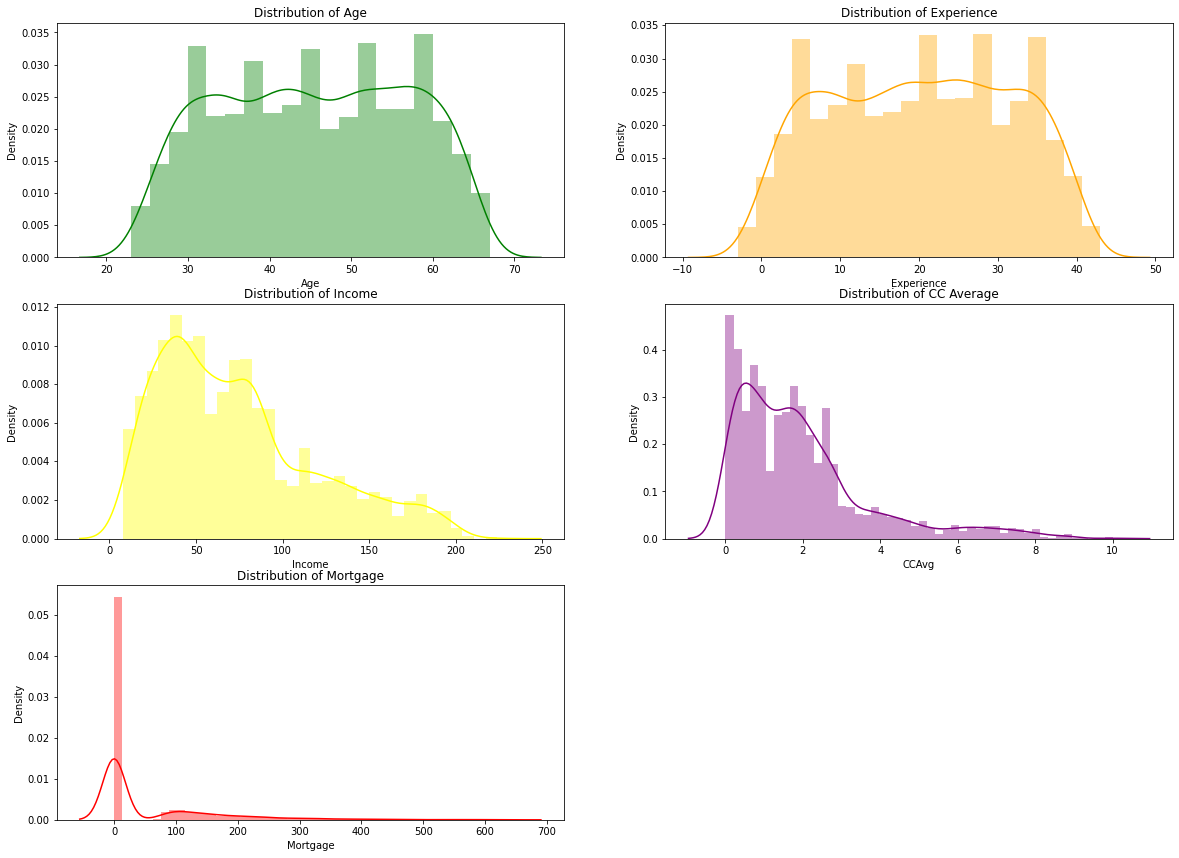

In [14]:
plt.figure(figsize=(20,25))

# subplot 1
plt.subplot(5, 2, 1)
plt.title('Distribution of Age')
sns.distplot(df_Bank['Age'],color='green')

# subplot 2
plt.subplot(5, 2, 2)
plt.title('Distribution of Experience')
sns.distplot(df_Bank['Experience'],color='orange')

# subplot 3
plt.subplot(5, 2, 3)
plt.title('Distribution of Income')
sns.distplot(df_Bank['Income'],color='yellow')

# subplot 4
plt.subplot(5, 2, 4)
plt.title('Distribution of CC Average')
sns.distplot(df_Bank['CCAvg'],color='purple')

# subplot 5
plt.subplot(5, 2, 5)
plt.title('Distribution of Mortgage')
sns.distplot(df_Bank['Mortgage'],color='red')

plt.show()

**Findings: Age and Experience are symetric with similar shape. Income, CCAverage and Mortgage are skewed**

### Univariate and Bivariate Analysis



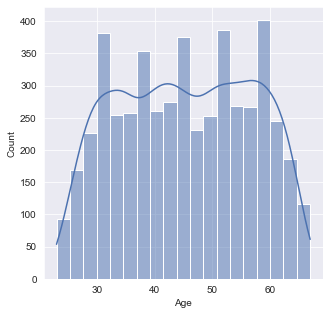

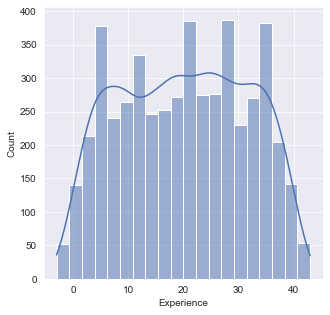

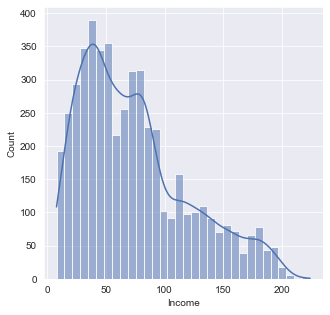

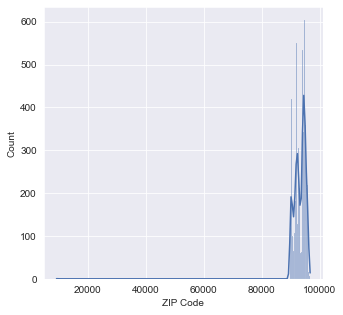

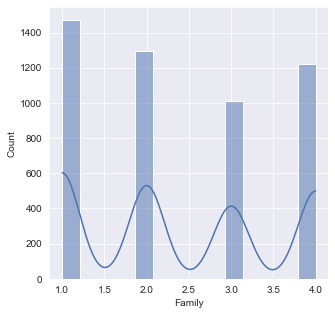

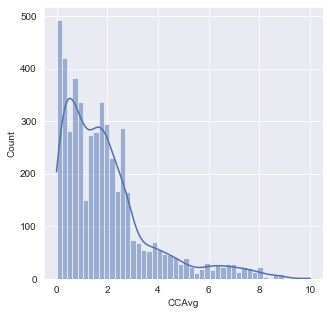

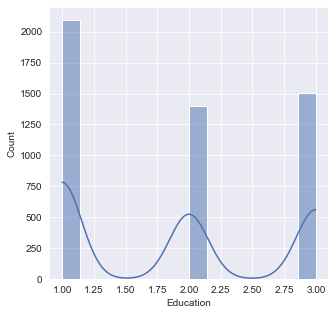

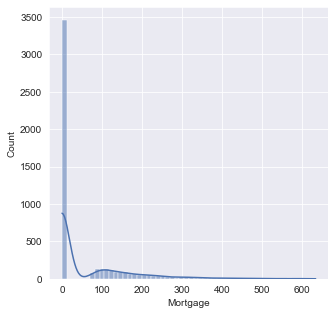

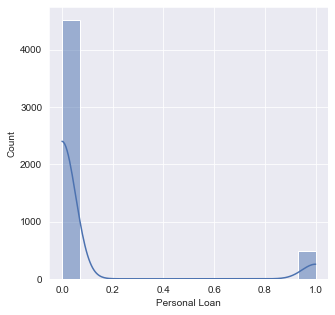

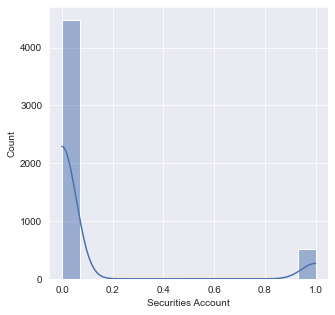

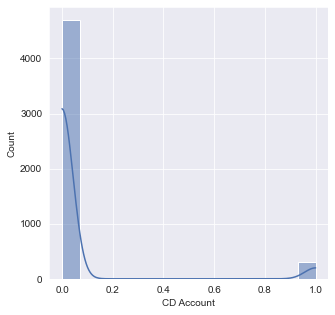

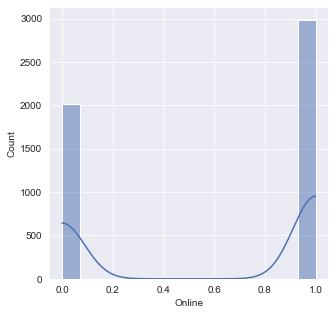

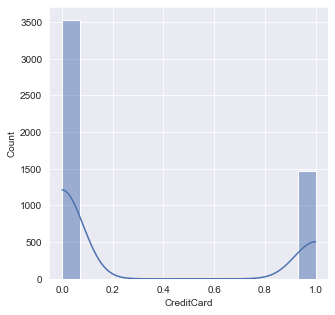

In [15]:
# let us plot all the columns to look at their distributions

df_Bank1 = df_Bank.drop('ID', axis =1)
for i in df_Bank1.columns:
    sns.set({'figure.figsize': (5,5)})
    sns.histplot(df_Bank1[i], kde=True)
    plt.show()

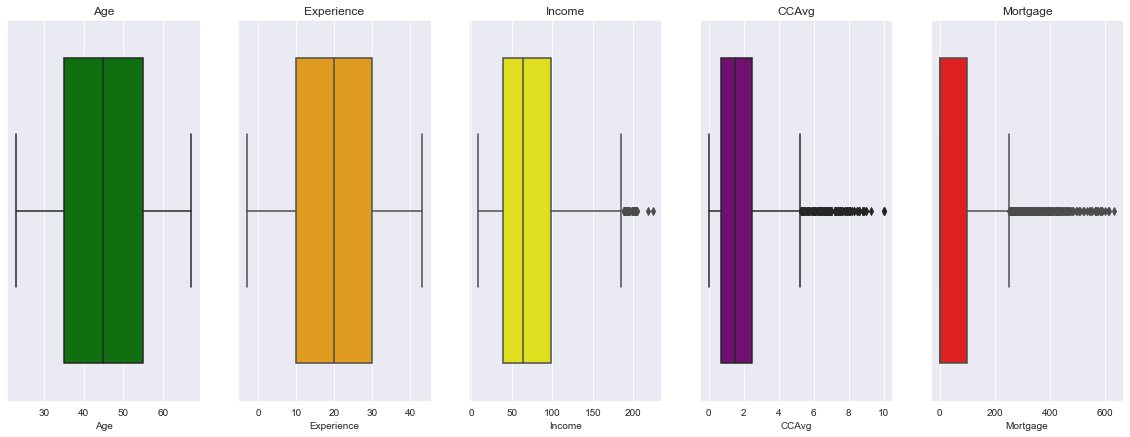

In [16]:
plt.figure(figsize=(20,7))

# subplot 1
plt.subplot(1, 5, 1)
plt.title('Age')
sns.boxplot(df_Bank['Age'],orient='vertical',color='green')

# subplot 2
plt.subplot(1, 5, 2)
plt.title('Experience')
sns.boxplot(df_Bank['Experience'],orient='vertical',color='orange')

# subplot 3
plt.subplot(1, 5, 3)
plt.title('Income')
sns.boxplot(df_Bank['Income'],orient='vertical',color='yellow')

# subplot 4
plt.subplot(1, 5, 4)
plt.title('CCAvg')
sns.boxplot(df_Bank['CCAvg'],orient='vertical',color='purple')

# subplot 5
plt.subplot(1, 5, 5)
plt.title('Mortgage')
sns.boxplot(df_Bank['Mortgage'],orient='vertical',color='red')

plt.show()

**Findings:**
1. Age is normally distributed with most customers between 35 and 55 Years

2. Experience is normally distributed with most customers having 11 to 30 Years of Exp

3. Income Positively skewed, most customers have income between 45K to 55K

4. CCAvg Positively skewed, most customers avg CC spending between 0K to 10K

5. Mortgage, most customers have mortgage less than 100K

Text(0.5, 1.0, 'Income Distribution')

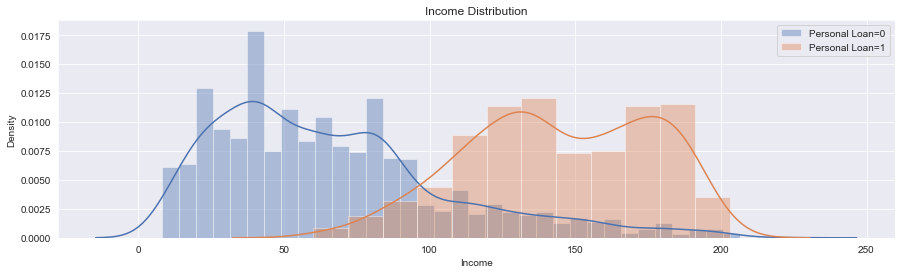

In [17]:
plt.figure(figsize=(15,4))
sns.distplot(df_Bank[df_Bank["Personal Loan"] == 0]['Income'], label='Personal Loan=0')
sns.distplot(df_Bank[df_Bank["Personal Loan"] == 1]['Income'], label='Personal Loan=1')
plt.legend()
plt.title("Income Distribution")

#### Findngs: Customers with Personal Loans appears to be clustered in the higher Income bracket. 

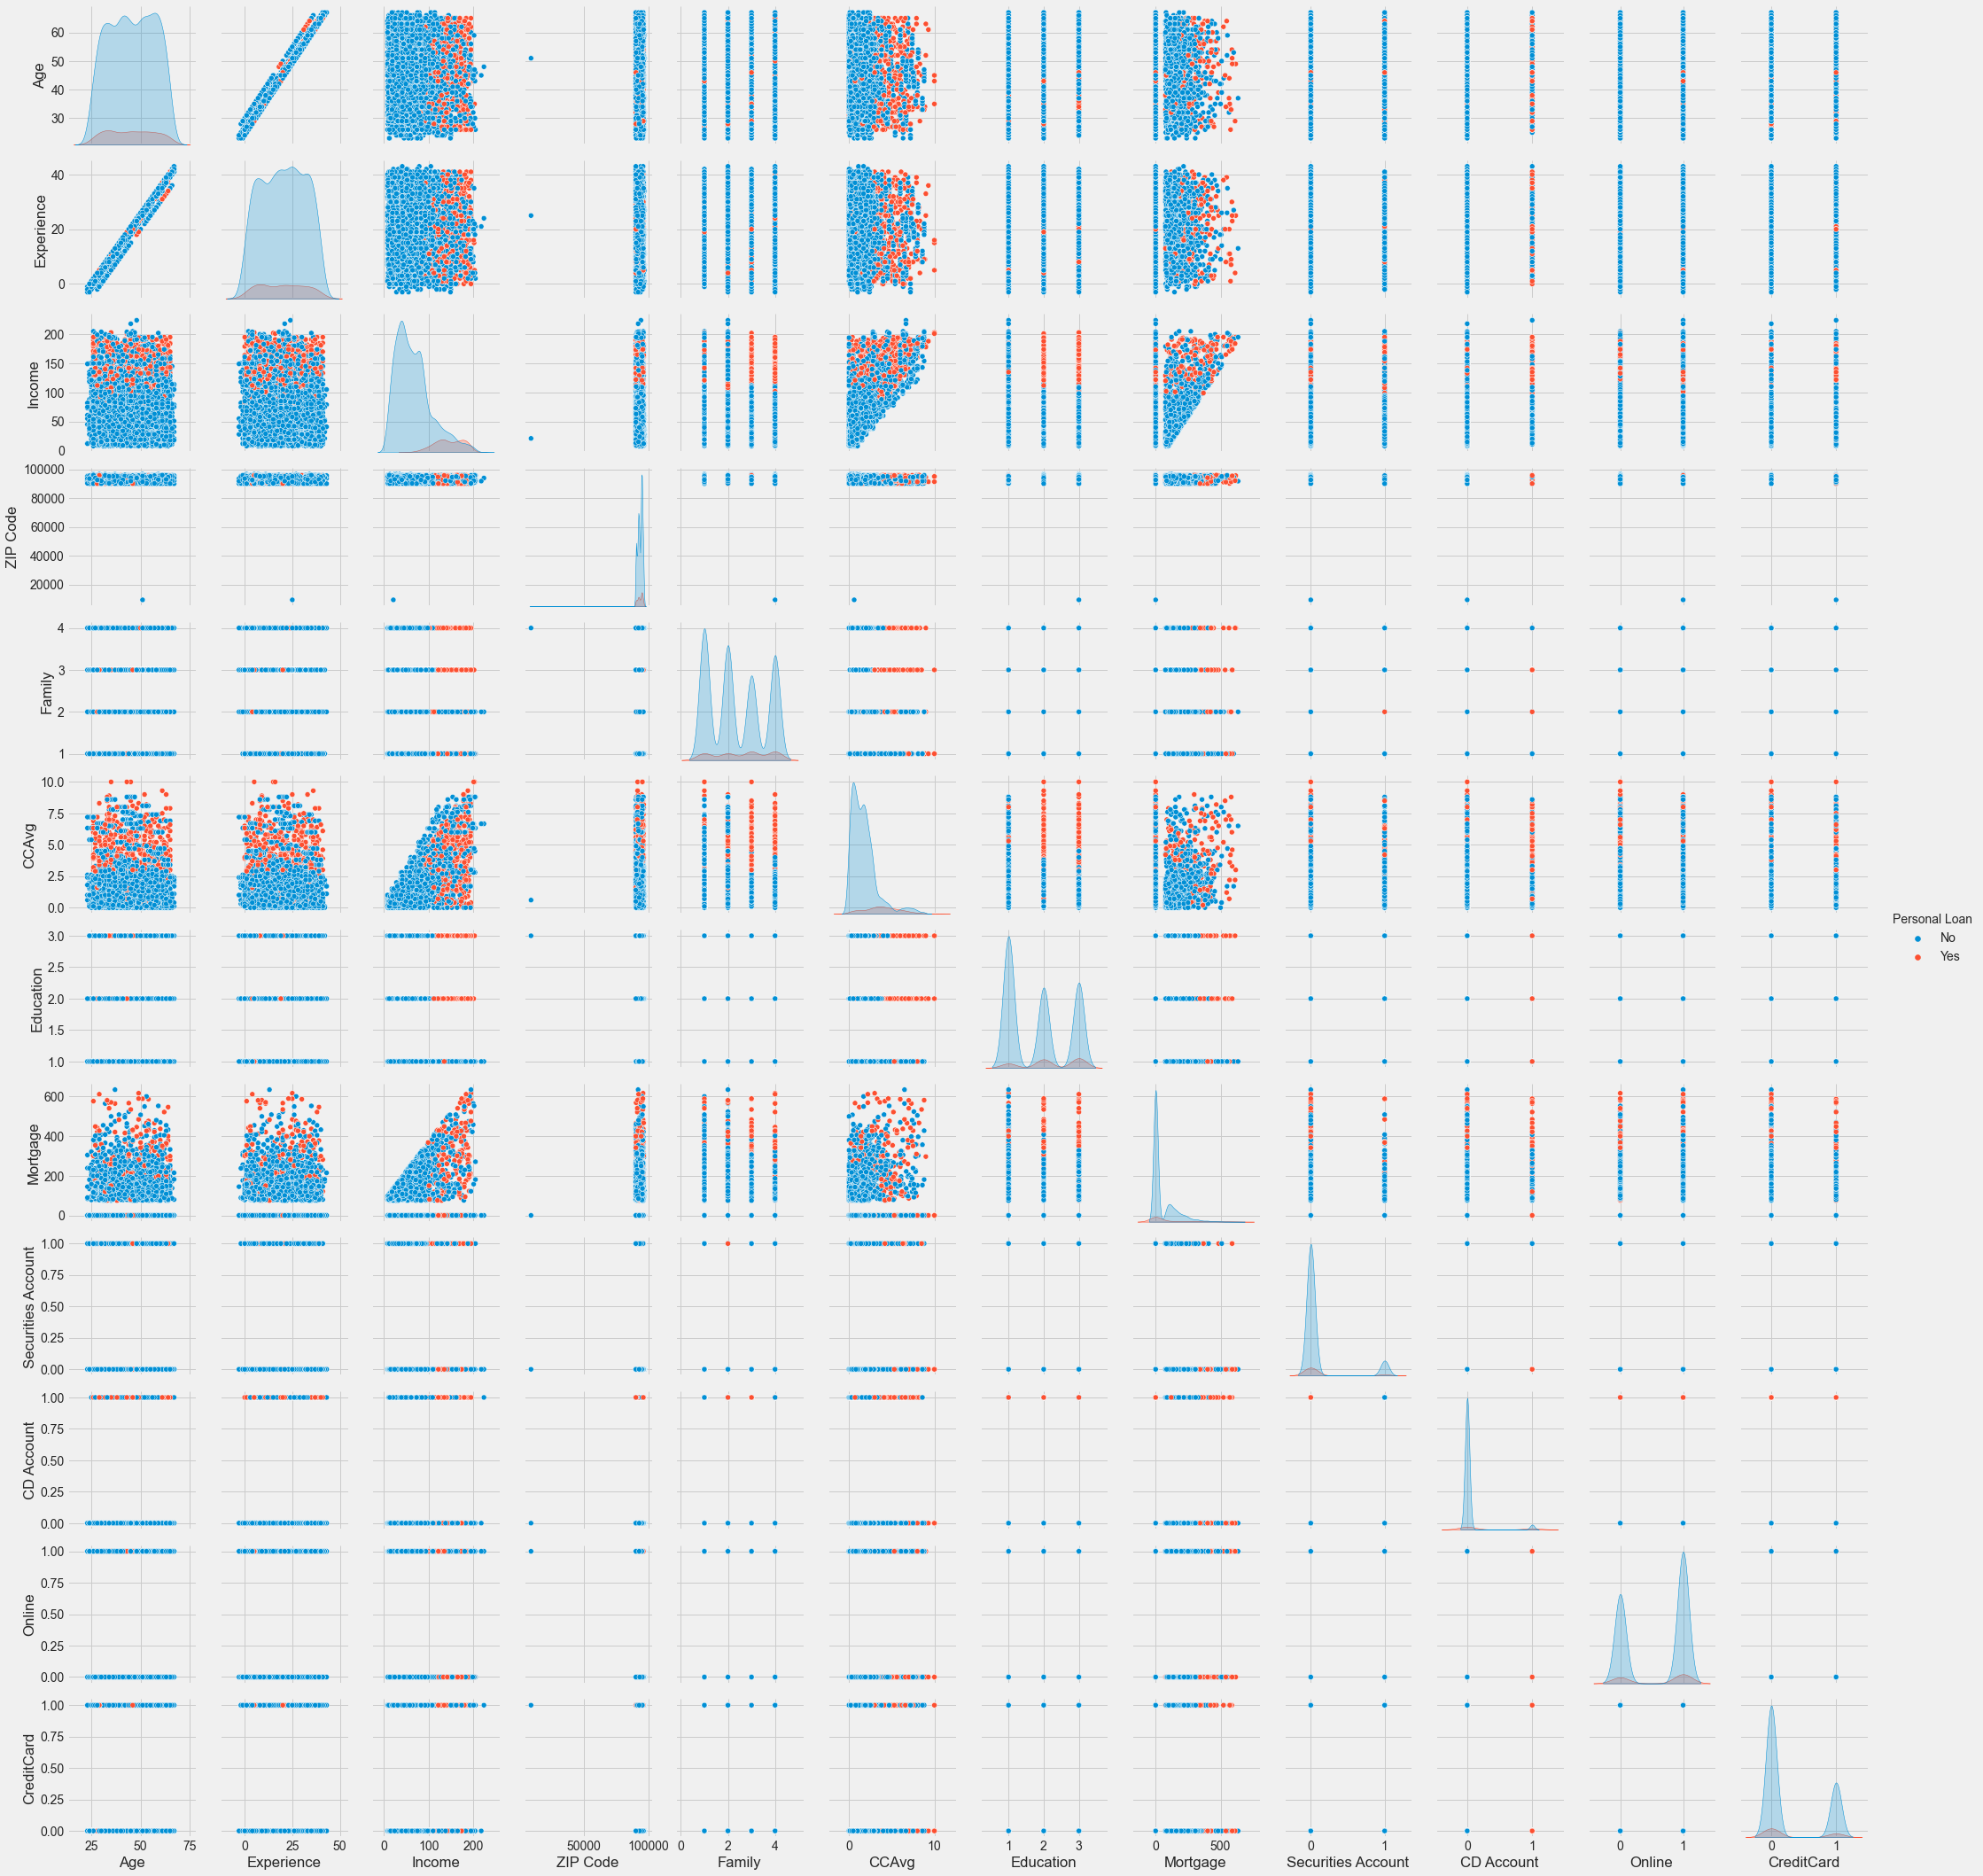

In [18]:
# let us plot all the columns to look at their distributions for people with loan (1) and people with no loan (0)
# Pairplot
import matplotlib.style as style; style.use('fivethirtyeight')
pairplt = df_Bank.drop('ID', axis = 1)
pairplt['Personal Loan'] = pairplt['Personal Loan'].replace({0: 'No', 1: 'Yes'})
sns.pairplot(pairplt, hue = 'Personal Loan')


**Findings:**
1. Age and Experience have strong positive correlation.
2. ZIP Code has one outlier value which is less than 10K.
3. People those who are taking Personal Loan that was offered to them in earlier campaign have a significantly different Income distribution then people who aren't taking the personal loan.
4. CCAvg i.e. Average spending on cards differs for people taking the personal loan and those who aren't taking the personal loan.
5. Family size is also an important factor for people considering taking personal loan from bank that was offered in earlier campaign and so is Mortgage, CD Account, Education (to some extent) among other variables.


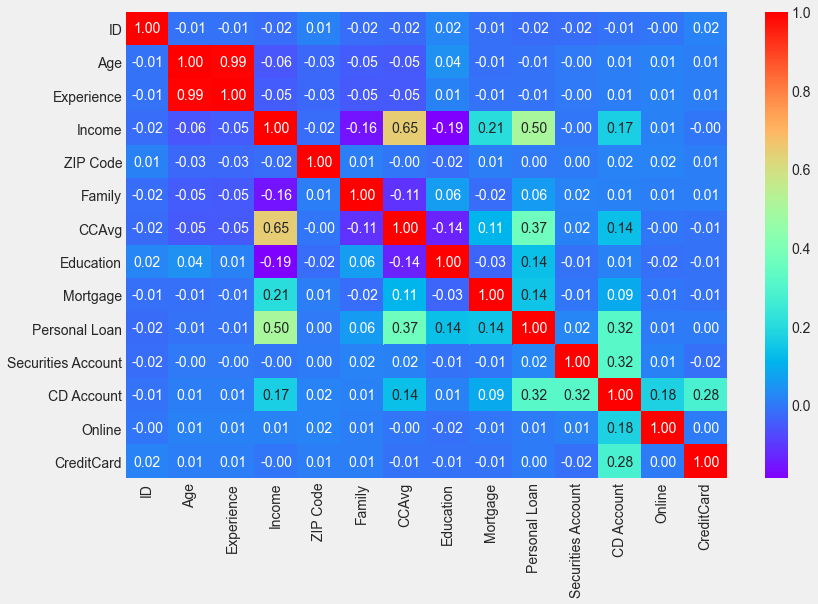

In [19]:
# Lets use a hitmap to visualize correlations
plt.figure(figsize=(12,8))
sns.heatmap(df_Bank.corr(),annot=True,fmt='.2f',cmap='rainbow', )
plt.show()

#### Findings: 
1. Strong correlation between Age and Experience.
2. Reasonable correlation between Income, CCAvg and Personal Loan.

## 3.0 Getting the Data Ready for the model

In [20]:
# Let's drop the ID and ZIP Code columns since they are irrelevant to the model

df_Bank.drop(['ID', 'ZIP Code'], axis = 1, inplace = True)
df_Bank.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [21]:
df_Bank.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,"5,000.00",45.34,11.46,23.00,35.00,45.00,55.00,67.00
Experience,"5,000.00",20.10,11.47,-3.00,10.00,20.00,30.00,43.00
Income,"5,000.00",73.77,46.03,8.00,39.00,64.00,98.00,224.00
Family,"5,000.00",2.40,1.15,1.00,1.00,2.00,3.00,4.00
CCAvg,"5,000.00",1.94,1.75,0.00,0.70,1.50,2.50,10.00
Education,"5,000.00",1.88,0.84,1.00,1.00,2.00,3.00,3.00
Mortgage,"5,000.00",56.50,101.71,0.00,0.00,0.00,101.00,635.00
Personal Loan,"5,000.00",0.10,0.29,0.00,0.00,0.00,0.00,1.00
Securities Account,"5,000.00",0.10,0.31,0.00,0.00,0.00,0.00,1.00
CD Account,"5,000.00",0.06,0.24,0.00,0.00,0.00,0.00,1.00


### Findings: Dropping irrelevant columns for the Logistic Model
1. ID Column has no relavance to the model since there is no association between ID and Personal Loan
2. Zip Code has zero correlation with the target variable Personal Loan. Therefore, it is dropped. Also, it is a nominal variable. 

### We've learned from the EDA analysis above regarding Experience values:
1. Experience has negative values and it needs to be addressed. It will be assumed that zero means no experience at all.

In [22]:
# Let's get more info as it pertains to Experience.
df_Bank['Experience'].describe()

count   5,000.00
mean       20.10
std        11.47
min        -3.00
25%        10.00
50%        20.00
75%        30.00
max        43.00
Name: Experience, dtype: float64

In [23]:
# let's find out detail information about the population impacted by this data entry error
df_Bank[df_Bank['Experience'] < 0].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,52.00,24.52,1.48,23.00,24.00,24.00,25.00,29.00
Experience,52.00,-1.44,0.64,-3.00,-2.00,-1.00,-1.00,-1.00
Income,52.00,69.94,37.96,12.00,40.75,65.50,86.75,150.00
Family,52.00,2.87,0.97,1.00,2.00,3.00,4.00,4.00
CCAvg,52.00,2.13,1.75,0.20,1.00,1.80,2.32,7.20
Education,52.00,2.08,0.84,1.00,1.00,2.00,3.00,3.00
Mortgage,52.00,43.60,90.03,0.00,0.00,0.00,0.00,314.00
Personal Loan,52.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Securities Account,52.00,0.12,0.32,0.00,0.00,0.00,0.00,1.00
CD Account,52.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


### Findings: There are a total of 52 customers/rows out of 5000 impacted by the incorrect data in Experience.
1. We can also note that the age of the people impacted range from 23 to 29.
2. Their income range from 12K to 150K
3. Furthermore, they have not got a personal loan yet and could be target for personal loan
4. Instead of dropping these 52 customers/rows from this analysis, let's populate the experience attribute with the experience median


In [24]:
# Let's replace only these 52 negative values with the Experience Median.
# We learned above the characteristics of the customers which the experience was set negative.
# Let's use these characteristics to calculate a Median that is relevant to these 52 customers. 

replace_value = df_Bank.loc[(df_Bank['Age'] > 23) & (df_Bank['Age'] <= 29) & (df_Bank['Income'] > 12) & (df_Bank['Income'] < 150) & 
         (df_Bank['Personal Loan'] == 0) & (df_Bank['CD Account'] == 0), 'Experience'].median()


df_Bank['Experience'] = np.where(df_Bank['Experience'] < 0, replace_value, df_Bank['Experience'])


In [25]:
df_Bank['Experience'].describe().T

count   5,000.00
mean       20.14
std        11.41
min         0.00
25%        10.00
50%        20.00
75%        30.00
max        43.00
Name: Experience, dtype: float64

#### Findings: 
1. Note Experience data distribution above after replacing the 52 negative values in Experience with the experience median.
2. We note above that the Experience mean, median and std was hardly impacted by fixing the Experience data.

## 4.0 Split the Data into training and test with 70:30 ratio

In [26]:
# Separating dependent and independent variables

from sklearn.model_selection import train_test_split

X = df_Bank.drop(['Personal Loan'], axis = 1)  # Predictor 
y = df_Bank['Personal Loan']  # Predicted (1=True, 0=False)

display(X.describe().T, X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.head()

,count,mean,std,min,25%,50%,75%,max
Age,"5,000.00",45.34,11.46,23.00,35.00,45.00,55.00,67.00
Experience,"5,000.00",20.14,11.41,0.00,10.00,20.00,30.00,43.00
Income,"5,000.00",73.77,46.03,8.00,39.00,64.00,98.00,224.00
Family,"5,000.00",2.40,1.15,1.00,1.00,2.00,3.00,4.00
CCAvg,"5,000.00",1.94,1.75,0.00,0.70,1.50,2.50,10.00
Education,"5,000.00",1.88,0.84,1.00,1.00,2.00,3.00,3.00
Mortgage,"5,000.00",56.50,101.71,0.00,0.00,0.00,101.00,635.00
Securities Account,"5,000.00",0.10,0.31,0.00,0.00,0.00,0.00,1.00
CD Account,"5,000.00",0.06,0.24,0.00,0.00,0.00,0.00,1.00
Online,"5,000.00",0.60,0.49,0.00,0.00,1.00,1.00,1.00


(5000, 11)

(5000,)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1840,55,25.00,23,4,0.40,3,88,0,0,0,0
2115,57,31.00,30,3,1.40,1,0,0,0,0,0
4437,63,38.00,63,2,1.50,1,0,0,0,1,0
1146,31,7.00,71,1,0.10,1,78,1,0,0,0
2486,61,36.00,130,1,1.30,1,257,0,0,0,0


In [27]:
# Let's check split of the data.
print("{0:0.2f}% data is in training set".format((len(X_train)/len(df_Bank.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(df_Bank.index)) * 100))

70.00% data is in training set
30.00% data is in test set


### 5.0 Logistic Regression 

In [28]:
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(df_Bank.loc[df_Bank['Personal Loan'] == 1]), (len(df_Bank.loc[df_Bank['Personal Loan'] == 1])/len(df_Bank.index)) * 100))
print("Original Personal Loan False Values    : {0} ({1:0.2f}%)".format(len(df_Bank.loc[df_Bank['Personal Loan'] == 0]), (len(df_Bank.loc[df_Bank['Personal Loan'] == 0])/len(df_Bank.index)) * 100))

print("")

print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan True Values    : 480 (9.60%)
Original Personal Loan False Values    : 4520 (90.40%)

Training Personal Loan True Values    : 323 (9.23%)
Training Personal Loan False Values   : 3177 (90.77%)

Test Personal Loan True Values        : 157 (10.47%)
Test Personal Loan False Values       : 1343 (89.53%)



In [29]:
from sklearn import metrics

from sklearn.metrics import recall_score, roc_auc_score, classification_report,confusion_matrix

from sklearn.linear_model import LogisticRegression


### 5.1 Fit Logistic Regression Model (Statsmodels) - Coefficients of the Logistic Regression

In [30]:
#Statemodel Logistic Regression depicting coefficients of all the attributes.

# let's fit on train data set and see how it scores against test data set.

logreg = LogisticRegression().fit(X_train,y_train)
logreg

print("Training set score: {:.3f}".format(logreg.score(X_train,y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test,y_test)))

# Let's invoke the Statesmodel displaying model scores and the coef of the independent variables.

import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())


Training set score: 0.949
Test set score: 0.948
Optimization terminated successfully.
         Current function value: 0.135106
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4989
Method:                           MLE   Df Model:                           10
Date:                Thu, 07 Jan 2021   Pseudo R-squ.:                  0.5727
Time:                        09:50:39   Log-Likelihood:                -675.53
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                   -0.5008      0.022    

#### Findings: Statemodel above depict the breakdown of the coefficient results and the associated p-values.

In [31]:
# Let's fit the logistic regression using liblinear on train data set and see how it scores against test data set.

model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

model_score = model.score(X_test, y_test)
print(model_score)

0.9486666666666667


In [32]:
recall_score(y_test,y_pred)

0.6178343949044586

In [33]:
roc_auc_score(y_test,y_pred)

0.8025880835281788

### Calculating Probability on Target

In [34]:
z = pd.DataFrame()                                  # creating a new dataframe
z['Actual'] = y_test.values                         # Storing actual output of target variable

z['Probability that output is 0'] = model.predict_proba(X_test)[:,0]
# Probabilities predicted by Logistic regression model
z['Probability that output is 1'] = model.predict_proba(X_test)[:,1]

z['Predicted'] = model.predict(X_test)              # Predicting target variable using sklearn Logistic regression

# In sklearn default threshold is 0.5
# therfore for all the values whose probability for 1 is greater than 0.5 will be predicted as 1

In [35]:
z.head(20)

,Actual,Probability that output is 0,Probability that output is 1,Predicted
0,0,1.00,0.00,0
1,1,0.68,0.32,0
2,0,0.96,0.04,0
3,0,1.00,0.00,0
4,0,1.00,0.00,0
5,0,1.00,0.00,0
6,0,0.94,0.06,0
7,0,0.99,0.01,0
8,0,0.99,0.01,0
9,0,0.91,0.09,0


### Depicting test data rows where Actual(Observed) values are not equal to the Predicted values

In [36]:
# For test data show all the rows where the predicted class is not equal to the observed class

pd.set_option('display.max_rows', 100)
incorrect = z[z['Actual'] != z['Predicted']]
print(" Total test data rows where Observed (Actual) not equal to Predicted Value", incorrect.count())
print('')
print("Rows where the Observed (Actual) is not equal to Predicted Values")
incorrect


 Total test data rows where Observed (Actual) not equal to Predicted Value Actual                          77
Probability that output is 0    77
Probability that output is 1    77
Predicted                       77
dtype: int64

Rows where the Observed (Actual) is not equal to Predicted Values


,Actual,Probability that output is 0,Probability that output is 1,Predicted
1,1,0.68,0.32,0
42,1,0.65,0.35,0
51,1,0.72,0.28,0
72,0,0.33,0.67,1
103,1,0.90,0.10,0
130,0,0.48,0.52,1
187,1,0.69,0.31,0
204,1,0.54,0.46,0
205,1,0.94,0.06,0
260,1,0.93,0.07,0


#### Findings: There are total of 77 test data rows where the Actual(Observed) values are not equal to the Predicted.

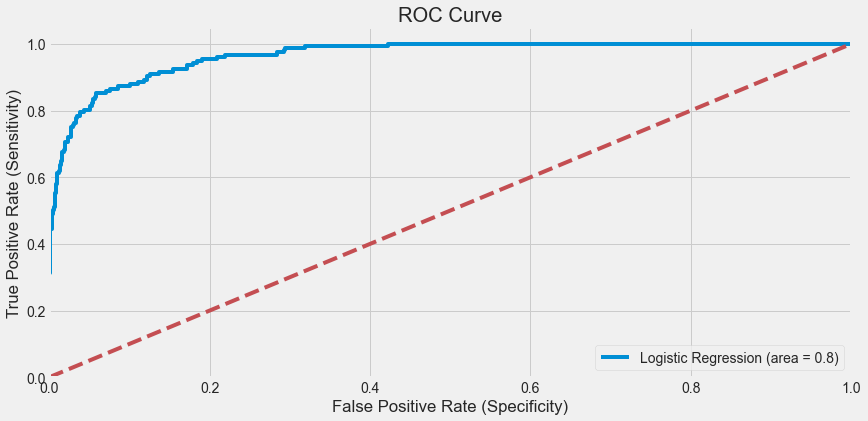

In [37]:
# ROC Curve
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

# These next 3 lines are already defined above but for clarity purpose of creating an ROC Curve, I am repeating it below.
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

y_true, y_pred = y_test, model.predict(X_test)

model_roc_auc = roc_auc_score(y_true, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_true, model.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'Logistic Regression (area = {})'.\
         format(model_roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve')
plt.legend(loc = 'lower right')
plt.show()

#### Findings:
1. The larger the area under the curve (AUC), the better the model is. we want Low False Positive Rate and High True Positive Rate.
2. We have an AUC of approximately .8. The closer we are to 1, the better the model.
3. Gini Coefficient = 2 * AUC -1. Thus Gini Coefficient = 2 * .8 - 1 = .6.

### Build a Confusion Matrix

In [38]:
# Confusion Matrix - Putting it all together

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

LR = LogisticRegression(solver="liblinear")
LR.fit(X_train, y_train)

print('LR accuracy for train set: {0:.3f}'.format(LR.score(X_train, y_train)))
print('LR accuracy for test set: {0:.3f}'.format(LR.score(X_test, y_test)))

y_true, y_pred = y_test, LR.predict(X_test)

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(3))

LR accuracy for train set: 0.950
LR accuracy for test set: 0.949

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1343
           1       0.85      0.62      0.72       157

    accuracy                           0.95      1500
   macro avg       0.90      0.80      0.84      1500
weighted avg       0.95      0.95      0.94      1500


Confusion Matrix:
 [[1326   17]
 [  60   97]]

Accuracy Score:
 0.949


### Findings: As shown above, we can infer the following Classification Performance from the Confusion Matrix Values:
1. **Accuracy:** Measure the ratio of correct predictions to total predictions made. **.95**
1. **Precision:** Measure of correctness achieved in prediction **(TP / TP + FP) = 0.85**
2. **Recall:**  Measure of completeness, actual true observations that are predicted correctly **(TP / TP + FN) = 0.62**
3. **Specificity:** Measure of how many observations of false category predicted correctly **(TN / TN + FP) = 0.99**
4. **F1-Score:** F1-score is defined as harmonic mean of precision and recall **(2 x Precision x Recall) / (Precision + Recall) = 0.72**


<AxesSubplot:>

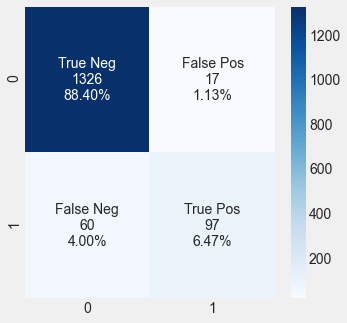

In [39]:
# A more visual friendly confusion Matrix

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in 
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

## Model Conclusions:

#### Evaluation of Logistic Regression Model: 
1. Performance measurement of classification algorithms are judge by confusion matrix which comprise the classification count values of actual and predicted labels. 

### Confusion Matrix Conclusion:

True Positives (TP): we predicted that **97 (6.47%)** people got a personal loan and they actually did. 
    
True Negatives (TN): we predicted that **1326 (88.40%)** people did not get a personal loan and they actually didn't.

False Positives (FP): we predicted that **17 (1.13%)** people got a loan (a "Type I error") and they actually did not.

False Negatives (FN): we predicted that **60 (4.00%)** people didn't get a personal loan (a "Type II error") and they actually did. 

#### Findings: Type I and Type II errors are NOT big enough to discredite the effectiveness of this Model. 

In [40]:
print('Model Predicted Correctly: {0:.3f} % of the time'.format(model_score * 100))

Model Predicted Correctly: 94.867 % of the time


### Model Classification Performance from the Confusion Matrix Values:
1. **Accuracy:** Measure the ratio of correct predictions to total predictions made: (TP + TN) / (TP+TN+FP+FN). **.95**
2. **Precision:** Measure of correctness achieved in prediction **(TP / TP + FP) = 0.85**
3. **Sensitivity:** Also called, Recall. Measure of completeness, actual true observations that are predicted correctly **(TP / TP + FN) = 0.62**
4. **Specificity:** Measure of how many observations of false category predicted correctly **(TN / TN + FP) = 0.99**
5. **F1-Score:** F1-score is defined as harmonic mean of precision and recall **(2 x Precision x Recall) / (Precision + Recall) = 0.72**

### Conclusions:

**Confusion Matrix False Positive is very low at (1.13%). This indicates that the risk to give a loan to a person that won't pay back is very small.**

**Model predicted correctly 94.8% of the time. Plus, model has an accuracy of about 95% and a precision of 85%.**

**In addition, model has a F1-Score of 72% and a very high Specificity of 99%.**

**Most importantly, Specificity is 99%. Not giving loan to a person that won't pay back is very important.**

**Based on these findings above, the risk of giving a loan to a person that won't pay back is small.**

**Therefore, this is a good model for predicting people that can be target for taking Personal Loans.**